# Murugiah_NavinKarthik_Final

### https://github.com/navinkarthik/Programming_for_Data_Science/blob/master/Murugiah_NavinKarthik_Final.ipynb

### Importing Data, Data Understanding

In [1]:
#Importing libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset
from keras.datasets import imdb
(X_train, y_train),(X_test, y_test)=imdb.load_data()
X=numpy.concatenate((X_train, X_test),axis=0)
y=numpy.concatenate((y_train, y_test),axis=0)

Using TensorFlow backend.


In [3]:
#Summarize size
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (50000,)
Shape of y: (50000,)


In [4]:
#Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [5]:
#Count of positive and negative reviews in the IMDB dataset
unique,counts = numpy.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 25000, 1: 25000}

In [6]:
#Count of number of words
print("Number of words: ",len(numpy.unique(numpy.hstack(X))))

Number of words:  88585


In [7]:
#Summarize review length
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

Mean 234.76 words (172.911495)


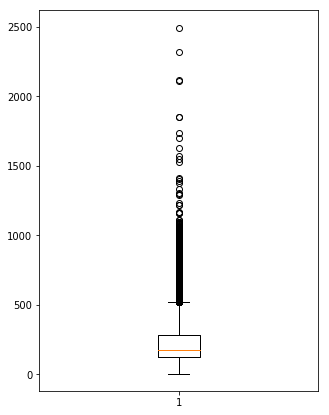

In [8]:
# plot review length
plt.figure(figsize=(5,7))
plt.boxplot(result)
plt.show()

# Recurrent Neural Network - LSTM

In [9]:
#Importing libraries
%matplotlib inline

from imp import reload
import itertools
import numpy as np
from __future__ import print_function
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [10]:
#Importing keras and dependent libraries
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

In [11]:
#Model parameters
max_features=20000
embedding_size=128
lstm_output_size=128
maxlen=80
batch_size=32
epochs=4

In [12]:
#Length of training and testing sequences
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train),'Training sequences')
print(len(X_test),'Testing sequences')

25000 Training sequences
25000 Testing sequences


In [13]:
#Padding sequences
X_train=sequence.pad_sequences(X_train, maxlen=maxlen)
X_test=sequence.pad_sequences(X_test, maxlen=maxlen)
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (25000, 80)
Testing data shape: (25000, 80)


In [14]:
#LSTM Model Building

#Adding sequential, input, hidden and output layers
model=Sequential()

#Input layer
model.add(Embedding(max_features, embedding_size))
model.add(LSTM(lstm_output_size, dropout=0.2, recurrent_dropout=0.2))

#Output layer
model.add(Dense(1, activation='sigmoid'))

In [15]:
#Compiling model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Training the model
model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 149s 6ms/step - loss: 0.4588 - acc: 0.7824 - val_loss: 0.3827 - val_acc: 0.8351
Epoch 2/4
25000/25000 [==============================] - 155s 6ms/step - loss: 0.3055 - acc: 0.8738 - val_loss: 0.3698 - val_acc: 0.8371
Epoch 3/4
25000/25000 [==============================] - 155s 6ms/step - loss: 0.2200 - acc: 0.9132 - val_loss: 0.4135 - val_acc: 0.8296
Epoch 4/4
25000/25000 [==============================] - 153s 6ms/step - loss: 0.1531 - acc: 0.9428 - val_loss: 0.4778 - val_acc: 0.8300


In [18]:
#Model Evaluation
score,accuracy=model.evaluate(X_test,y_test,batch_size=batch_size)
y_pred=model.predict_classes(X_test,batch_size=batch_size)

25000/25000 [==============================] - 27s 1ms/step


In [19]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[10560,  1940],
       [ 2309, 10191]], dtype=int64)

In [20]:
#F1 score
f1_macro=f1_score(y_test,y_pred,average='macro') 
f1_micro=f1_score(y_test,y_pred,average='micro')

print('Test accuracy:',accuracy)
print('Test score (loss):',score)
print('F1 Score (Macro):',f1_macro)
print('F1 Score (Micro):',f1_micro)

Test accuracy: 0.83004
Test score (loss): 0.477804362361
F1 Score (Macro): 0.830002964854
F1 Score (Micro): 0.83004


#### I've studied the concepts of CNN on my own and implemented it

# Convoluted Neural Networks

In [21]:
#Importing Libraries
%matplotlib inline
from imp import reload

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import print_function
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [22]:
#Importing Keras and dependent libraries
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Flatten
from keras.datasets import imdb
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
from IPython.display import Image

In [23]:
#Defining model parameters
#Embedding
embedding_size = 50
max_features = 5000
maxlen = 400

#Convolution
kernel_size = 3
pool_size = 4
filters = 250

#Dense
hidden_dims = 250

#Training
batch_size = 64
epochs = 4

In [24]:
#Train test split
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [25]:
#Padding sequences
X_train=sequence.pad_sequences(X_train,maxlen=maxlen)
X_test=sequence.pad_sequences(X_test,maxlen=maxlen)

print('Train data size:',X_train.shape)
print('Test data size:',X_test.shape)

Train data size: (25000, 400)
Test data size: (25000, 400)


In [26]:
#Adding Sequential model
model = Sequential()

#Input Layers
model.add(Embedding(max_features,embedding_size,input_length=maxlen))
model.add(Dropout(0.2))

model.add(Conv1D(filters,kernel_size,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())

#We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

#We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Model Evaluation
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

In [27]:
#Training the model
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 315s 13ms/step - loss: 0.4399 - acc: 0.7734 - val_loss: 0.2909 - val_acc: 0.8778
Epoch 2/4
25000/25000 [==============================] - 286s 11ms/step - loss: 0.2421 - acc: 0.9016 - val_loss: 0.2575 - val_acc: 0.8920
Epoch 3/4
25000/25000 [==============================] - 270s 11ms/step - loss: 0.1698 - acc: 0.9353 - val_loss: 0.2695 - val_acc: 0.8912
Epoch 4/4
25000/25000 [==============================] - 268s 11ms/step - loss: 0.1155 - acc: 0.9585 - val_loss: 0.2876 - val_acc: 0.8903


In [28]:
#Evaluate model
score,accuracy=model.evaluate(X_test,y_test,batch_size=batch_size)
y_pred=model.predict_classes(X_test,batch_size=batch_size)

25000/25000 [==============================] - 39s 2ms/step


In [29]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[11134,  1366],
       [ 1377, 11123]], dtype=int64)

In [30]:
#F1 score
f1_macro=f1_score(y_test,y_pred,average='macro') 
f1_micro=f1_score(y_test,y_pred,average='micro')

print('Test accuracy:',accuracy)
print('Test score (loss):', score)
print('F1 Score (Macro):',f1_macro)
print('F1 Score (Micro):',f1_micro)

Test accuracy: 0.89028
Test score (loss): 0.287565770979
F1 Score (Macro): 0.890279978758
F1 Score (Micro): 0.89028
